# 금보원 데이터챌린지_계획서 제출 코드

## 1. 데이터셋 및 라이브러리 불러오기

In [68]:
import pandas as pd

In [151]:
samsung = pd.read_csv(r".\data\삼성카드_data.csv",encoding='cp949')
insurance = pd.read_csv(r".\data\보험개발원_data.csv",encoding='cp949')
class_name = pd.read_csv('./data/카드_대중소분류.csv',encoding='cp949')

### 데이터셋 concat

In [70]:
df= pd.concat([samsung, insurance], axis=1)

In [71]:
df = df.fillna(0)

In [72]:
df["보험료"]=df["보험료"].apply(lambda x: x.strip().replace(",","")).astype(int)
df["지급금액"]=df["지급금액"].apply(lambda x: x.strip().replace(",","")).astype(int)

## 생명 보험 1, 장기 보험 2, 자동차 보험 3

In [73]:
df['보험종류']

0    1
1    1
2    1
3    1
4    2
5    2
6    3
7    3
8    3
9    1
Name: 보험종류, dtype: int64

In [74]:
df['생명보험사고율']=df["사고건수"]/df["계약건수"]
df['장기보험사고율']=df["지급금액"]/df["보험료"]
df['자동차보험사고율']= df["지급금액"]/df["보험료"]

In [75]:
def grade_acc(row):
    if row['보험종류'] == 1:
        ratio=row["사고건수"]/row["계약건수"]
    
    elif row['보험종류'] == 2:
        ratio=row["지급금액"]/row["보험료"]
    
    else:
        ratio= row["지급금액"]/row["보험료"]
        
    if ratio <= 0.2:
        return 0
    
    elif ratio <= 0.4:
        return 1

    elif ratio <= 0.6:
        return 2
    
    elif ratio <= 0.8:
        return 3
    
    return 4

In [76]:
df["보험_사고율_등급"]= df.apply(grade_acc, axis=1)

<Axes: ylabel='Frequency'>

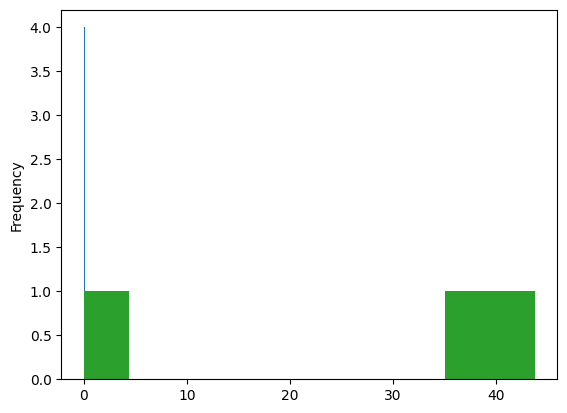

In [77]:
df[df['보험종류']==1]['생명보험사고율'].plot.hist()
df[df['보험종류']==2]['장기보험사고율'].plot.hist()
df[df['보험종류']==3]['자동차보험사고율'].plot.hist()

In [78]:
df[['보험종류', '보험_사고율_등급', '사고건수', '계약건수', '생명보험사고율']]

,보험종류,보험_사고율_등급,사고건수,계약건수,생명보험사고율
0,1,0,0,0.5,0.00
1,1,0,0,1.0,0.00
2,1,4,1,1.0,1.00
3,1,0,0,1.0,0.00
4,2,0,0,2.0,0.00
5,2,4,2,1.0,2.00
6,3,4,1,0.8,1.25
7,3,4,1,1.0,1.00
8,3,0,0,1.0,0.00
9,1,0,0,1.0,0.00


사고율 feature 추가

## 데이터 전처리 코드 모음

In [331]:
# 금액을 int로 변경
df["보험료"]=df["보험료"].apply(lambda x: x.strip().replace(",","")).astype(int)
df["지급금액"]=df["지급금액"].apply(lambda x: x.strip().replace(",","")).astype(int)

# 각 보험별 사고율 계산
df['생명보험사고율']=df["사고건수"]/df["계약건수"]
df['장기보험사고율']=df["지급금액"]/df["보험료"]
df['자동차보험사고율']= df["지급금액"]/df["보험료"]

df["보험_사고율_등급"]= df.apply(grade_acc, axis=1)



AttributeError: 'int' object has no attribute 'strip'

## 2. 데이터 분석 

## 3. feature 생성

- 평균 매출 금액 = 매출 금액 합 / 매출 금액 건수

0. feature 대분류 dictionary 만들기

In [161]:
big_group = set(class_name['대'])

class_dic = {}

for big in big_group:
    class_dic[big] = {}
    
    middle_group = set(class_name[class_name['대']==big]['중'])
    
    for middle in middle_group:
        small_group = set(class_name[(class_name['대']==big) & (class_name['중']==middle)]['소'])
        class_dic[big][middle] = small_group

print(class_dic)

{'쇼핑': {'화장품': {'화장품', '미용용품'}, '자': {'주류판매점'}, '의류': {'의류'}, '면세점': {'면세점'}, '백화점': {'백화점'}, '쇼핑기타': {'방문판매'}, '아울렛': {'아울렛'}, '패션잡화': {'패션잡화'}, '온라인쇼핑': {'종합몰', '오픈마켓', 'PG_일반인증', '홈쇼핑', '기타쇼핑몰'}, '상품권': {'상품권'}, '문구사무용품': {'문구사무용품'}, '스포츠의류용품': {'스포츠의류용품'}, '마트/할인점': {'마트', '대형마트/할인점'}, '편의점': {'연금_복지매장', '편의점'}, '가전': {'가전'}}, '건강': {'건강보조': {'요양원', '건강보조식품', '산후조리원', '안경', '양약국', '의료기기용품'}, '병원': {'피부과', '내과', '비뇨기과', '보건소', '한의원', '기타외과', '한방종합', '이비인후과', '산부인과_조산원', '안과', '피부비뇨기과', '양방종합', '방사선과', '양한방종합', '성형외과', '치과'}, '뷰티': {'이발소', '미용관리', '미용실'}}, '여행': {'숙박': {'캠프장', '호텔', '여관', '콘도'}, '여행상품': {'관광여행사'}, '교통': {'고속도로휴게실', '철도', '렌터카', '항공', '고속버스', '여객선'}}, '요식': {'제과점': {'제과점_아이스크림점'}, '음식점': {'일식', '한식', '부페', '양식', '주점', '중식', '패스트푸드점', '간이음식점'}, '커피/음료': {'커피/음료'}, '배달앱': {'배달앱'}}, '유흥': {'유흥': {'유흥'}}, '생활': {'정기결제': {'도시가스', '통신비', '전기', '4대보험', '관리비'}, '가례': {'가례'}, '보험': {'손해보험', '생명보험'}, '공과금': {'국세', '지방세', '공공요금'}, '인테리어': {'인테리어'}, '주생활관리': {'주생활관리'}}, '여가': {'놀

1) 대분류별 데이터셋 생성

In [79]:
big_list = ["요식","자동차","교육","건강","여가","생활","유흥","쇼핑","여행"]

In [325]:
alpha = ["A","B","C","D","E","F","G"]

In [81]:
data = df[['기준년도', 'AGE', 'GENDER', 'JOB', 'INCOME', 'HOM_MGPO', 'HOM_SGG',
       'OFFI_MGPO', 'OFFI_SGG', 'ONEPER_GD_C', 'EST_LFSTG', 'UMRD_SCORE',
       'WEDD_EXP_SCORE', 'CHDB_EXP_SCORE', 'PSCH_OCH_SCORE', 'ESTUD_OCH_SCORE',
       'MHSTUD_OCH_SCORE', 'CSTUD_OCH_SCORE', 'OCH_WEDD_EXP_SCORE',
       'HOUSEWF_SCORE', 'ONL_PRSN', 'ERADP_TNDC', 'PRMM_CSM_TNDC', 'MDLV_PRSN',
       'PET_PRSN', 'ODS_ACTI_INRT_TNDC', 'FRN_TRV_INRT_TNDC',
       'INTERI_SLNG_TNDC', 'INTERI_REMDL_TNDC', 'HL_MNGT_INRT_TNDC']].copy()

In [104]:
df.loc[:,'총사용건수_합'] = (df['총사용건수_A'].values+df['총사용건수_B'].values+df['총사용건수_C'].values+df['총사용건수_D'].values+df['총사용건수_E'].values)
#df["총사용금액_합"] = df['총사용금액_A']+df['총사용금액_B']+df['총사용금액_C']+df['총사용금액_D']+df['총사용금액_E']

In [105]:
df.loc[:,'총사용금액_합'] = (df['총사용금액_A'].values+df['총사용금액_B'].values+df['총사용금액_C'].values+df['총사용금액_D'].values+df['총사용금액_E'].values)

In [106]:
df.loc[:,'총_평균금액_합'] = df['총사용금액_합']/df['총사용건수_합']

In [326]:
for big in class_dic.keys():
    df.loc[:,big+'_총사용건수_합']=0
    for a in alpha:
        df.loc[:,big+'_총사용건수_합'] += df["매출건수합계_"+big+"_"+a].values
    
    for mid in class_dic[big].keys():
        df.loc[:,mid+'_총사용건수_합']=0
        for a in alpha:
            df.loc[:,mid+'_총사용건수_합'] += df["매출건수합계_"+mid+"_"+a].values
            
        for small in class_dic[big][mid].keys():
            df.loc[:,small+'_총사용건수_합']=0
            for a in alpha:
                df.loc[:,small+'_총사용건수_합'] += df["매출건수합계_"+small+"_"+a].values
# for i in big_list:
#     df.loc[:,i+'_총사용금액_합']=0
#     for j in alpha:
#         df.loc[:,i+'_총사용금액_합'] += df["매출금액합계_"+i+"_"+j].values
        
# for i in big_list:
#     df.loc[:,i+'_평균사용금액']= df[i+'_총사용금액_합']/df[i+'_총사용건수_합']

KeyError: '매출건수합계_화장품_A'

In [107]:
for i in big_list:
    df.loc[:,i+'_총사용건수_합']=0
    for j in alpha:
        df.loc[:,i+'_총사용건수_합'] += df["매출건수합계_"+i+"_"+j].values

In [108]:
for i in big_list:
    df.loc[:,i+'_총사용금액_합']=0
    for j in alpha:
        df.loc[:,i+'_총사용금액_합'] += df["매출금액합계_"+i+"_"+j].values

In [109]:
for i in big_list:
    df.loc[:,i+'_평균사용금액']= df[i+'_총사용금액_합']/df[i+'_총사용건수_합']

## 2. 등급 부여하기
- 등급은 값이 높을 수록 평균 사용금액이 높은 것을 의미한다.

In [88]:
def grade(bin_number,series):
    min_ = min(series.values)
    max_ = max(series.values)
    bin_size = (max_-min_)/bin_number
    grade_list = series.values
    # 등급 생성
    grade_list = []
    data = min_
    for i in range(bin_number+1):
        grade_list.append(data)
        data+= bin_size
    return grade_list

In [89]:
def grade_apply(x,columns_list):
    for i in range(len(columns_list)-1) :
        if x<=columns_list[i+1]:
            return i+1
    return len(columns_list)-1

In [90]:
# grade_list 전역변수로 지정 

In [91]:
columns_grade_list = ["요식_평균사용금액", '자동차_평균사용금액', '교육_평균사용금액', '건강_평균사용금액', '여가_평균사용금액',
       '생활_평균사용금액', '유흥_평균사용금액', '쇼핑_평균사용금액','UMRD_SCORE',
       'WEDD_EXP_SCORE', 'CHDB_EXP_SCORE', 'PSCH_OCH_SCORE', 'ESTUD_OCH_SCORE',
       'MHSTUD_OCH_SCORE', 'CSTUD_OCH_SCORE', 'OCH_WEDD_EXP_SCORE',
       'HOUSEWF_SCORE', 'ONL_PRSN', 'ERADP_TNDC', 'PRMM_CSM_TNDC', 'MDLV_PRSN',
       'PET_PRSN', 'ODS_ACTI_INRT_TNDC', 'FRN_TRV_INRT_TNDC',
       'INTERI_SLNG_TNDC', 'INTERI_REMDL_TNDC', 'HL_MNGT_INRT_TNDC']
 

In [110]:
for c in columns_grade_list:
    grade_list = grade(10,df[c]) # 분류별 범위 리스트 생성
    df.loc[:,c+"등급"]=df[c].apply(grade_apply,args=(grade_list,)) # apply 작성

# 3. 대분류 그래프 생성

## 1)사고율 별 그룹 생성

data drop

In [93]:
feature_list = ['AGE', 'GENDER', 'JOB', 'INCOME','요식_평균사용금액등급',
       '자동차_평균사용금액등급', '교육_평균사용금액등급', '건강_평균사용금액등급', '여가_평균사용금액등급',
       '생활_평균사용금액등급', '유흥_평균사용금액등급', '쇼핑_평균사용금액등급', 'UMRD_SCORE등급',
       'WEDD_EXP_SCORE등급', 'CHDB_EXP_SCORE등급', 'PSCH_OCH_SCORE등급',
       'ESTUD_OCH_SCORE등급', 'MHSTUD_OCH_SCORE등급', 'CSTUD_OCH_SCORE등급',
       'OCH_WEDD_EXP_SCORE등급', 'HOUSEWF_SCORE등급', 'ONL_PRSN등급', 'ERADP_TNDC등급',
       'PRMM_CSM_TNDC등급', 'MDLV_PRSN등급', 'PET_PRSN등급', 'ODS_ACTI_INRT_TNDC등급',
       'FRN_TRV_INRT_TNDC등급', 'INTERI_SLNG_TNDC등급', 'INTERI_REMDL_TNDC등급',
       'HL_MNGT_INRT_TNDC등급']

In [111]:
df = df.reset_index()

## 2) 그래프 생성

In [319]:
def merge_big_graph(acc_dic, acc_data, max_group):
    temp = dict()
    c_list = list()
    
    group_list = acc_dic.keys()
    
    for group in group_list:
        big_set = set()
        big_group_data = acc_data[acc_data['index'].isin(acc_dic[group])]
        
        for column in feature_list:
            value_counts = acc_data[column].value_counts()

            if len(value_counts) > max_group:
                continue
            
            for value, count in value_counts.items():
                c_list.append(f'{column}_{value}')
            
            for big in class_dic.keys():
                if big in column:
                    big_set.add(big)
                    
        group_result = '-'.join(c_list)
        temp[group_result] = (big_set, big_group_data['index'])
        
    acc_dic = temp

In [320]:
def filter_graph(acc_dic, acc_data, min_count, max_group, feature_list):
    for column in feature_list:
        value_counts = acc_data[column].value_counts()
        
        value_counts = {key: value for key, value in value_counts.items() if value > min_count}
        
        if len(value_counts) > max_group:
            continue
        
        for value, count in value_counts.items():
            acc_dic[f'{column}_{value}'] = set(acc_data[acc_data[column] == value]['index'])

In [ ]:
biggroup_dic[j] = dict()
acc_dic = biggroup_dic[j]

# 대분류 필터링
filter_graph(acc_dic, acc_data, min_count, max_group, feature_list) # 사고율 별 1차 필터링
merge_big_graph(acc_dic, acc_data, max_group) # 대분류 2차 필터링

In [321]:
graph = {}
num_acc_group = 5
max_group = 2
min_count = 0

for i in range(1,4):
    insurance_data = df[df['보험종류']==i]
    
    graph[i] = dict()
    biggroup_dic = graph[i]
    for j in range(1, num_acc_group+1): # 사고율 별 계산
        acc_data = insurance_data[insurance_data['보험_사고율_등급']==j]
        
        biggroup_dic[j] = dict()
        acc_dic = biggroup_dic[j]
        
        # 대분류 필터링
        filter_graph(acc_dic, acc_data, min_count, max_group, feature_list) # 사고율 별 1차 필터링
        merge_big_graph(acc_dic, acc_data, max_group) # 대분류 2차 필터링
        
        # 중분류 필터링
        for big_feature in acc_dic.keys(): # 대분류 별 진행
            feature_list = []
            big_list = acc_dic[big_feature][0] # 대분류 리스트
            mid_data = acc_data[acc_data['index'].isin(acc_dic[big_feature][1])] # 해당 대분류에 해당하는 데이터
            
            mid_dic = dict()
            big_graph = acc_dic[big_feature]
            
            for b in big_list:
                feature_list.append(i for i in class_dic[b].keys())
            
            # 중분류 필터링
            filter_graph(acc_dic, acc_data, min_count, max_group, feature_list) # 중분류 1차 그래프 생성
            merge_big_graph(acc_dic, acc_data, max_group) # 중분류 2차 필터링
        
            # 소분류도 중분류와 같은 방식으로 진행
            # ....

## 중복제거

In [ ]:
result = dict()

for i in range(1,4): # 보험 별
    biggroup_dic = graph[i]
    feature_set = dict()
        
    for j in range(1, num_acc_group+1): # 사고율 별 feature 집합 구분
        feature_set[j] = set()
        
        for feature in biggroup_dic[j].keys():
            feature_set[j].add(feature)
        
    for now in range(len(feature_set)):
        temp = feature_set[now]
        for other in range(len(feature_set)):
            if now == other:
                continue
            temp = temp.difference(feature_set[other])
    
        result[now] = temp


## 3) 검증

In [ ]:
for i in range(1,4): # 보험 별
    biggroup_dic = graph[i]
    
    for j in range(1, num_acc_group+1): # 사고율 별 F1-Score 계산
        answer = set(df[(df['보험종류'] == i) & (df['보험_사고율_등급'] == j)]['index'])
        predict = set()
        
        acc_graph = biggroup_dic[j]
        feature_set = set(acc_graph.keys())
        
        for feature_join in feature_set: # 각 조건 별 해당하는 index 추출
            f_dict = dict()
            feature_pair = feature_join.split('-')
            
            for f in feature_pair:
                feature = f.split('_')
                f_dict[feature[0]] = feature[1]
                
            df_temp = df
            for key, value in f_dict.items():
                df_temp = df_temp[df_temp[key] == value]
            
            predict &= set(df_temp['index'])
                
        TP = len(answer & predict)
        FP = len(predict - answer)
        FN = len(answer - predict)
        
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1_score = 2 * (precision * recall) / (precision + recall)
    
        print(f'{i}보험 {j}사고율에 해당하는 F1-Score : ', f1_score)

## 4) 그래프 그리기

In [329]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph, ensurance, file_name): # 임시 코드 (현재 데이터로 그래프 생성 불가)
    G = nx.DiGraph()

    def add_edges(graph, node, parent_node=None):
        if parent_node:
            G.add_edge(parent_node, node)
        for child_node, value in graph[node].items():
            G.add_edge(node, child_node)
            add_edges(graph[node], child_node, node)

    add_edges(graph, list(graph.keys())[0])

    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=500, \
                     font_size=12, edge_color='gray',\
                     width=1.0, arrowsize=15, arrowstyle='->')

    plt.axis('off')
    plt.save(f'./figure/{ensurance}/{file_name}_graph.jpeg')
    plt.show()

In [ ]:
for i in range(1,4): # 보험 별 그래프 생성
    biggroup_dic = graph[i]
    
    for j in range(1, num_acc_group+1): # 사고율 별 그래프 생성
        acc_graph = biggroup_dic[j]
        draw_graph(acc_graph, i, j) # 폴더이름은 추후 변경